# Homework 03: Discrimination by Regression
## Kerem Girenes
### March 28, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

## Import Data

In [2]:
images = np.genfromtxt('hw03_data_set_images.csv',delimiter=',').reshape(5, 39, 320)
labels = np.char.strip(np.genfromtxt('hw03_data_set_labels.csv',delimiter=',',dtype=str),'"').reshape(5, 39).astype(int)

print(images.shape,"\n")
print(labels.shape,"\n")

(5, 39, 320) 

(5, 39) 



## Create Training and Test Sets

In [3]:
x_train = images[:,:25,:].reshape(125, 320)  #training set images
y_train = labels[:,:25].reshape(125,)  #training set labels

x_test = images[:,25:,:].reshape(70, 320)  #test set images
y_test = labels[:,25:].reshape(70,)  #test set labels

# class size
K = np.amax(y_train)

# character size
C = x_train.shape[1]

# training set size
N_train = y_train.shape[0]

# test set size
N_test = y_test.shape[0]

print(y_train.shape)
print(x_train.shape)

print(N_train)

print(x_train)

(125,)
(125, 320)
125
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## One-Hot Encoding

In [4]:
# Training Set Encoding
y_train_onehot = [[0 for k in range(K)] for n in range(N_train)]

for n in range(N_train):
    y_train_onehot[n][y_train[n]-1] = 1
    
y_train_onehot = np.array(y_train_onehot)

# Test Set Encoding
y_test_onehot = [[0 for k in range(K)] for n in range(N_test)]

for n in range(N_test):
    y_test_onehot[n][y_test[n]-1] = 1
    
y_test_onehot = np.array(y_test_onehot)

## Learning Parameters

In [5]:
eta = 0.001
epsilon = 0.001

## Sigmoid Function

In [6]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

## Gradient Functions

In [7]:
# define the gradient functions
def gradient_w(x, y_truth, y_predicted):
    return (np.asarray([-np.matmul((y_truth[:, k] - y_predicted[:, k])  * y_predicted[:, k] * (1 - y_predicted[:, k]), x) for k in range(K)]).transpose())

def gradient_w0(y_truth, y_predicted):
    return (-np.sum((y_truth - y_predicted) * y_predicted * (1 - y_predicted), axis = 0))

## Parameter Initialization

In [8]:
# randomly initalize w and w0
np.random.seed(421)
w = np.random.uniform(low = -0.01, high = 0.01, size = (x_train.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm

In [9]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    y_predicted = sigmoid(x_train, w, w0)
    
    objective_values = np.append(objective_values, 0.5 * np.sum((y_train_onehot - y_predicted) ** 2))
    w_old = w
    w0_old = w0

    w = w - eta * gradient_w(x_train, y_train_onehot, y_predicted)
    w0 = w0 - eta * gradient_w0(y_train_onehot, y_predicted)

    if np.sqrt(np.sum((w0 - w0_old)) ** 2 + np.sum((w - w_old) ** 2)) < epsilon:
        break

    iteration = iteration + 1
    
print(w)
print(w0)

print(iteration)
print(objective_values)

[[-0.007313   -0.04365135 -0.02283699  0.11954214 -0.02471816]
 [-0.0772168   0.00808906 -0.11410913  0.19204372  0.02484684]
 [-0.08098001  0.06492251 -0.12291065  0.15759649  0.03581208]
 ...
 [ 0.04350351  0.12033443  0.03493316 -0.14106721 -0.11477042]
 [ 0.05483368 -0.15529821  0.04138291 -0.18311856 -0.01104428]
 [ 0.07461121 -0.23759405  0.09797277 -0.15343788 -0.01975529]]
[[-0.04886843 -0.17238056 -0.01419691 -0.03881936 -0.16691034]]
1054
[77.32911385 53.43736072 48.21974348 ...  0.96997126  0.9689756
  0.96798189]


## Plotting Convergence

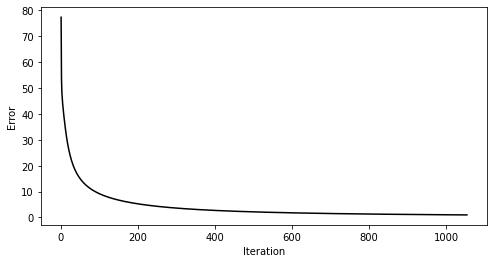

In [10]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Set Confusion Matrix

In [11]:
y_predicted_max = np.argmax(y_predicted, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_max, np.sum(y_train_onehot * np.array([1,2,3,4,5]), axis=1), rownames = ['y_pred'], colnames = ['y_train'])

print(confusion_matrix)

y_train   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


## Test Set Confusion Matrix

In [12]:
y_predicted_test = sigmoid(x_test, w, w0)

y_predicted_test_max = np.argmax(y_predicted_test, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_test_max, np.sum(y_test_onehot * np.array([1,2,3,4,5]), axis=1), rownames = ['y_pred'], colnames = ['y_test'])
print(confusion_matrix)

y_test   1   2   3   4   5
y_pred                    
1       13   1   0   0   0
2        1  11   0   0   1
3        0   0  14   0   0
4        0   0   0  14   0
5        0   2   0   0  13
